In [18]:
%notebook inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [19]:
import urllib, cStringIO
from PIL import Image

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from get_point_history import pget
from point_history import getmes
from get_point_map import get

In [21]:
from IPython.display import HTML, display

In [22]:
import matplotlib.dates as mdates

In [23]:
import pandas as pd
import pickle
import folium
from folium import plugins

In [24]:
from grid import *
from dep import *

In [25]:
from scipy.ndimage import imread

In [26]:
from netCDF4 import Dataset

In [27]:
from mpl_toolkits.basemap import Basemap, shiftgrid

In [28]:
import itertools

In [13]:
%matplotlib notebook

In [14]:
import matplotlib
matplotlib.style.use('ggplot')

In [15]:
import datetime

In [35]:
import os

In [29]:
date=datetime.datetime(2016,12,13,0)

In [30]:
path='/mnt/web/brey/hincast/'

In [31]:
basename='med'

In [32]:
SAVEPATH='bulletin/'

In [36]:
if not os.path.exists(SAVEPATH): os.makedirs(SAVEPATH)

In [37]:
OFILE='Locations.txt'

In [38]:
obs=pd.read_csv(OFILE,delimiter='\t')

In [39]:
obs

,ID,NAME,latobs,lonobs
0,1630,Almeira (ES),36.72506,-2.468386
1,1706,Valencia (ES),39.44040,-0.299000
2,819,Barcelona (ES),41.27749,2.213909
3,1449,Ibiza (ES),38.79034,1.450980
4,1461,Palma de Mallorca (ES),39.39457,2.614552
5,100080,Cartagena (ES),37.45276,-0.982284
6,1741,Sete (FR),43.31857,3.761195
7,1721,Cannes (FR),43.44241,6.971288
8,938,Melilla (ES),35.38344,-2.867047
9,100062,Saida Marina (MA),35.18242,-2.271415


In [40]:
obs=obs.set_index('ID')

In [42]:
ids=obs.index.values

# MEDITERRANEAN SEA STORM SURGE BULLETIN

In [18]:
print datetime.datetime.strftime(date,'%d %b %Y %H:%M')

11 Jan 2016 00:00


In [19]:
print 'Issued {} AM UTC and valid for the next 72 h'.format(datetime.datetime.strftime(datetime.datetime.utcnow(),'%d %b %Y %I:%M'))

Issued 04 Oct 2016 08:54 AM UTC and valid for the next 72 h


In [20]:
#first graph

In [21]:
date=datetime.datetime(2016,10,1,0)

In [22]:
tdate=datetime.datetime.strftime(date,"%Y%m%d%H")
tdate24=datetime.datetime.strftime(date+datetime.timedelta(days=1),"%Y%m%d%H")
tdate48=datetime.datetime.strftime(date+datetime.timedelta(days=2),"%Y%m%d%H")
tdate72=datetime.datetime.strftime(date+datetime.timedelta(days=3),"%Y%m%d%H")

In [23]:
fdate=datetime.datetime.strftime(date,"%Y%m%d.%H")
fdate24=datetime.datetime.strftime(date+datetime.timedelta(days=1),"%Y%m%d.%H")
fdate48=datetime.datetime.strftime(date+datetime.timedelta(days=2),"%Y%m%d.%H")
fdate72=datetime.datetime.strftime(date+datetime.timedelta(days=3),"%Y%m%d.%H")

In [150]:
date=datetime.datetime(2016,1,11,0)

In [158]:
OFILE='../DELFT3D/SeaLevelBuoys2.csv'

In [159]:
OFILE='../DELFT3D/SeaLevelDbDevices2.csv'

In [160]:
obs=pd.read_csv(OFILE,encoding = 'utf8',engine='python')

In [161]:
obs.columns=np.append('ID',obs.columns[1:])

In [162]:
obs=obs.set_index('ID')

In [163]:
obs.head()

,lat,lon,name,status,country,location
ID,,,,,,
2071,52.933998,1.302000,Cromer,active,Spain,NaN
2068,53.867779,8.717500,Cuxhaven,active,Spain,NaN
2072,46.158943,-1.219317,La Rochelle - La Pallice,active,Spain,NaN
2069,60.154003,-1.140381,Lerwick,active,Spain,NaN
2067,54.085335,-4.766917,Port Erin,active,Spain,NaN


In [31]:
obs[['lat','lon']] = obs[['lat','lon']].apply(pd.to_numeric)

In [32]:
mapa = folium.Map(location=[39, 18], zoom_start=4)

In [33]:
for i in range(len(ids)):
    try:
        folium.Marker(obs.xs(ids[i])[['lat','lon']].values.astype(float), popup=obs.xs(ids[i])['name']).add_to(mapa)
    except:
        pass

In [31]:
#mapa.create_map('tmp/test.html')

In [34]:
mapa

In [35]:
min_lon=-5.5
max_lon=43.
min_lat=28.5
max_lat=47.5

In [36]:
%%skip
mapa.add_children(plugins.ImageOverlay(dimage,opacity=1,bounds=[[min_lat, min_lon], [max_lat, max_lon]]))
mapa

In [37]:
url2='http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_IR108EColor-centralEurope.jpg'
url3='http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_RGB-naturalcolor-centralEurope.jpg'

In [38]:
%%skip
file2= cStringIO.StringIO(urllib.urlopen(url2).read())
file3= cStringIO.StringIO(urllib.urlopen(url3).read())
img2=Image.open(file2)
img3=Image.open(file3)
fig, axes = plt.subplots(ncols=2, figsize=(12,5))
axes[0].imshow(img2)
axes[0].axis('off')
axes[0].set_title('METEOSAT(EUMETSAT)')
axes[1].imshow(img3)
axes[1].axis('off')

plt.figtext(.12, .12,'Meteosat 0 degree, Channels, IR 10.8', size=15)
plt.figtext(.55,.12,'Meteosat 0 degree, RGB Composite, Natural Colors', size=15)

In [39]:
image_list='<table><tr><td><img src={} style="height="770px"; width="550px"; object-fit: contain"></td><td><img src={} style="height="770px"; width="550px"; object-fit: contain"></td></tr></table>'.format(url2,url3)

METEOSAT(EUMETSAT)

In [40]:
display(HTML(image_list))

,


In [41]:
print '{}                         {}'.format('Meteosat 0 degree, Channels, IR 10.8' ,  'Meteosat 0 degree, RGB Composite, Natural Colors')

Meteosat 0 degree, Channels, IR 10.8                         Meteosat 0 degree, RGB Composite, Natural Colors


In [42]:
url4='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},0,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate)

In [43]:
url5='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},24,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate24)

In [44]:
dl1=urllib.urlretrieve(url4,filename='tmp/e0.png')

In [45]:
dl2=urllib.urlretrieve(url5,filename='tmp/e24.png')

METEOROLOGIC ANALYSIS (ECMWF )

The wind speed indicated is the 850hPa isobaric surface, which is around 1.5km above sea level

In [46]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format(url4,url5)

In [47]:
display(HTML(image_list))

,


In [48]:
print '{}                                                {}'.format('Analysis Time 0','Forecast 24h')

Analysis Time 0                                                Forecast 24h


In [49]:
url6='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},48,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate48)

In [50]:
url7='https://apps.ecmwf.int/plots/product-download/medium/public_plots/?time={},72,{}&parameter=Wind%20850%20and%20mslp&area=Europe&token=c81fef1f1cb0f267d31e72f30545129e&email=gbreyiannis@gmail.com'.format(tdate,tdate72)

In [51]:
dl3=urllib.urlretrieve(url6,filename='tmp/e48.png')

In [52]:
dl4=urllib.urlretrieve(url7,filename='tmp/e72.png')

In [53]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format(url6,url7)

In [54]:
display(HTML(image_list))

,


In [55]:
print '{}                                                {}'.format('Forecast 48h','Forecast 72h')

Forecast 48h                                                Forecast 72h


In [56]:
url_1 = 'http://www.mareografico.it/DATA/Ginostra.jpg'
dl5=urllib.urlretrieve(url_1,filename='tmp/ginostra.png')

In [57]:
url_2='http://www.webcam.comune.genova.it/images_out/current.jpg'
dl6=urllib.urlretrieve(url_2,filename='tmp/genova.png')

In [58]:
url_3='http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg'
dl7=urllib.urlretrieve(url_3,filename='tmp/venice.png')

In [59]:
#rdate=datetime.datetime(date.year, date.month, date.day)

In [60]:
path='/mnt/rmdisk/2016N/'

In [61]:
basename='med'

In [62]:
ppath=path+'{}/{}/{:02d}/'.format(date.month,date.day,date.hour)

In [63]:
# read grid and bath
grid = Grid.fromfile(ppath+basename+'.grd')
deb0=Dep.read(ppath+basename+'.dep',grid.shape)
w=np.isnan(deb0.val).T

In [64]:
with open(ppath+basename+'.pkl', 'r') as f:
    ptr=pickle.load(f)

In [67]:
#read the netCDF file
try:
        d = Dataset(ppath+'trim-'+basename+'.nc')
        h=d.variables['S1'][:,:,:]
        u=d.variables['WINDU'][:,:,:]
        v=d.variables['WINDV'][:,:,:]
        time=d.variables['time'][:]
        lons=d.variables['XCOR'][:]
        lats=d.variables['YCOR'][:]
        xz=d.variables['XZ'][1:-1,1:-1] # center of cells for h excluding surrounding box
        yz=d.variables['YZ'][1:-1,1:-1]
        tstamp=[]
        for l in time : tstamp.append(date+datetime.timedelta(0,int(l)))
except Exception as e:
    print e


In [68]:
minlon=lons.min()
maxlon=lons.max()
minlat=lats.min()
maxlat=lats.max()

In [69]:
m = Basemap(projection='cyl',llcrnrlat=minlat,urcrnrlat=maxlat,\
             llcrnrlon=minlon,urcrnrlon=maxlon,resolution='l')


In [70]:
parallels = np.arange(-90.,90,20.)
meridians = np.arange(0.,360.,20.)

In [71]:
#maximum height for all hours
hmax=np.amax(h,axis=0)

In [75]:
bounds=np.arange(0.1,3.1,.1)

<IPython.core.display.Javascript object>


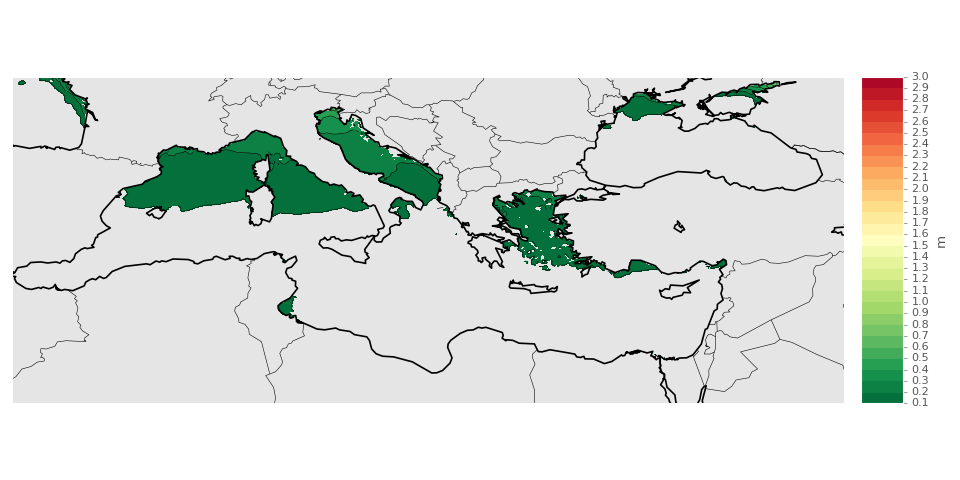

In [77]:
fig = plt.figure(figsize=(12,6))
mhmax=np.ma.masked_array(hmax[1:-1,1:-1],w[1:-1,1:-1]) # mask height
CS1 = m.contour(xz,yz,mhmax,bounds,linewidths=0.5,colors='k',animated=True)
CS2 = m.contourf(xz,yz,mhmax,bounds,cmap=plt.cm.RdYlGn_r,animated=True)
cb = m.colorbar(CS2,"right", size="5%", pad="2%", ticks=bounds)
cb.set_label('m')
plt.tight_layout()
m.drawcoastlines(linewidth=1.5)
m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

plt.savefig('tmp/hmax.png')

In [78]:
plt.ioff()
for i in range(0,u.shape[0],24):
    fig = plt.figure(figsize=(12,6))
    vel=np.sqrt(u[i,:,:]**2+v[i,:,:]**2)
    mvel=np.ma.masked_array(vel,w) # mask total velocity
    CS1 = m.contour(lons,lats,mvel,10,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(lons,lats,mvel,10,cmap=plt.cm.RdBu_r,animated=True)
    cb = m.colorbar(CS2,"right", size="5%", pad="2%")
    cb.set_label('m/s')
    mu=np.ma.masked_array(u[i,:,:],w) # mask velocities
    mv=np.ma.masked_array(v[i,:,:],w)
    Q = m.quiver(lons[::20,::20],lats[::20,::20],mu[::20,::20],mv[::20,::20])#,scale=200)
    qk = plt.quiverkey(Q, 0.1, 0.1, 20, '20 m/s', labelpos='W')
    plt.tight_layout()
    m.drawcoastlines(linewidth=1.5)
    m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

    plt.savefig('tmp/w{}.png'.format(i))

In [79]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/w0.png','tmp/w24.png')

WIND IMPOSED
The wind speed here is 10 m height wind and is the quantity imposed to the sea surface

In [80]:
display(HTML(image_list))

,


In [81]:
print '{}                         {}'.format('Wind Speed at sea level at time 0 h', 'Wind Speed at sea level at time 24 h')

Wind Speed at sea level at time 0 h                         Wind Speed at sea level at time 24 h


In [82]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/w48.png','tmp/w72.png')

In [83]:
display(HTML(image_list))

,


In [84]:
print '{}                         {}'.format('Wind Speed at sea level at time 48 h', 'Wind Speed at sea level at time 72 h')

Wind Speed at sea level at time 48 h                         Wind Speed at sea level at time 72 h


SEA LEVEL EVOLUTION

In [93]:
for i in range(0,u.shape[0],24):
    fig = plt.figure(figsize=(12,6))
    mh=np.ma.masked_array(h[i,1:-1,1:-1],w[1:-1,1:-1]) # mask height
    CS1 = m.contour(xz,yz,mh,bounds,linewidths=0.5,colors='k',animated=True)
    CS2 = m.contourf(xz,yz,mh,bounds,cmap=plt.cm.RdYlGn_r,animated=True)
    cb = m.colorbar(CS2,"right", size="5%", pad="2%", ticks=bounds)
    cb.set_label('m')
    plt.tight_layout()
    m.drawcoastlines(linewidth=1.5)
    m.drawcountries()
#m.drawparallels(parallels)
#m.drawmeridians(meridians)

    plt.savefig('tmp/h{}.png'.format(i))

In [105]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/h0.png','tmp/h24.png')

In [106]:
display(HTML(image_list))

,


In [107]:
print '{}                                 {}'.format('Sea Level Height at time 0 h','Sea Level Height at time 24 h')

Sea Level Height at time 0 h                                 Sea Level Height at time 24 h


In [108]:
image_list='<table><tr><td><img src={}></td><td><img src={}></td></tr></table>'.format('tmp/h48.png','tmp/h72.png')

In [109]:
display(HTML(image_list))

,


In [110]:
print '{}                                 {}'.format('Sea Level Height at time 48 h','Sea Level Height at time 72 h')

Sea Level Height at time 48 h                                 Sea Level Height at time 72 h


In [154]:
fdate=datetime.datetime.strftime(date,"%Y%m%d.%H")

In [155]:
date10=date-datetime.timedelta(days=10)

In [156]:
fdate10=datetime.datetime.strftime(date10,"%Y%m%d.%H")

In [164]:
#get data
tota=[]
for n in ids:
    #print n
    t,s,plat,plon,bname,bid = getmes(date10,date,n)
    dic0={'t_gauge':t, 'sh':[a for [a,b,c] in s], 'tide':[b for [a,b,c] in s], 'ss':[c for [a,b,c] in s]}
    data0=pd.DataFrame(dic0)
    data0=data0.set_index('t_gauge')
    try:
        hcw,hw=pget(fdate10,fdate,path,basename,ptr[n])
        #hcw,hw=get(fdate,fdate,path,basename,plat,plon)
    except:
        hw=np.empty(np.size(t))
        hw.fill(np.nan)
        hcw=t
    dic2={'t_his':hcw, 's_his':hw}
    data2=pd.DataFrame.from_dict(dic2)
    data2=data2.set_index('t_his')
    data0=data0.join(data2, how='outer')
    tota.append(data0)

In [165]:
tota=pd.concat(tota, keys=ids)

In [166]:
#tota.head()

In [167]:
tota[['sh','tide','ss','s_his']] = tota[['sh','tide','ss','s_his']].apply(pd.to_numeric)

In [199]:
#tota.xs(ids[0]).plot()

In [169]:
def plotf(i):
    try:
        ax=tota.xs(np.int(i))[['sh','ss','tide']].dropna().apply(pd.to_numeric).plot(style=['r-','g-','b-'])
        tota.xs(np.int(i))[['s_his']].dropna().apply(pd.to_numeric).plot(ax=ax, style=['k-'])
    except:
        tota.xs(np.int(i))[['s_his']].dropna().apply(pd.to_numeric).plot(style=['k-'])

In [200]:
#plotf(ids[1])

In [ ]:
#data0.plot(subplots=True)

In [171]:
def fplot(ax,sat,col):
    ax.plot_date(sat.index,sat,'-')
#    ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0,24,12)))
#    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M\n%d-%b'))
    ax.xaxis.grid(True, which="minor")
   # ax.yaxis.grid()
#    ax.xaxis.set_major_locator(mdates.MonthLocator())
#    ax.xaxis.set_major_formatter(mdates.DateFormatter('\n\n%Y'))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

    return ax

In [172]:
plt.ioff()

In [173]:
for i in range(len(ids)):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fplot(ax,tota.xs(ids[i])['ss'].dropna(),'ss')
    fplot(ax,tota.xs(ids[i])['s_his'].dropna(),'s_his')
    plt.legend()
    ax.set_title(obs.xs(ids[i])['name'])
    ax.set_ylim(-.5,0.75)#np.max([0.75,idat[['ss','s_his']].max().max()]))
    ax.set_xlim(date10,date+datetime.timedelta(days=3))
    ax.set_ylabel('Height (m)')
    fig.savefig('tmp/g{}.png'.format(i))

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [175]:
plt.close()

In [176]:
plt.ion()

## SEA LEVEL STORM SURGE MEASUREMENTS AND MODELLING ESTIMATES

WEST MEDITERRANEAN SEA : SPAIN AND FRANCE

In [177]:
#%%skip
a=np.arange(4)
b=np.arange(2)
glist=[]
for r in itertools.product(a,b): glist.append((r[0],r[1]))

<IPython.core.display.Javascript object>


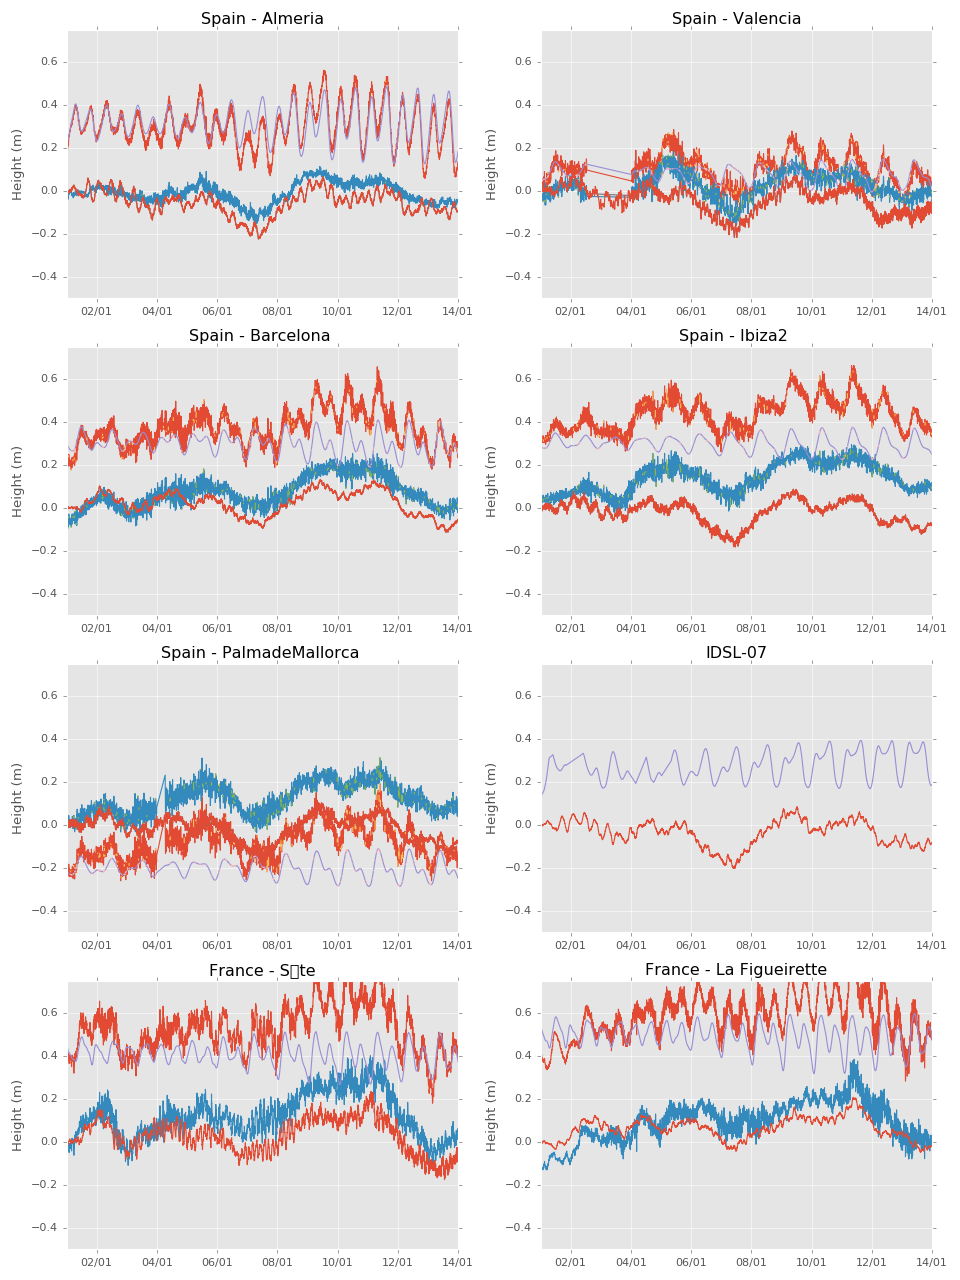

In [178]:
#%%skip
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[:8]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist[i]]=fplot(axes[glist[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist[i]]=fplot(axes[glist[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist[i]].set_title(obs.xs(val)['name'])
    axes[glist[i]].set_ylim(-.5,0.75)#np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist[i]].set_xlim(date10,date+datetime.timedelta(days=3))
    axes[glist[i]].set_ylabel('Height (m)')
fig.tight_layout()

In [179]:
%%skip
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[:8]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['s_his'][shmask].plot(ax=axes[glist[i]],title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist[i]].set_ylabel('height')
    except:
        pass
    try:
        idat['ss'][smask].plot(ax=axes[glist[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass

#   axes[glist[i]]
fig.tight_layout()

SOUTH - WEST MEDITERRANEAN SEA : SPAIN , MOROCCO

In [180]:
glist1=(0,1)

<IPython.core.display.Javascript object>


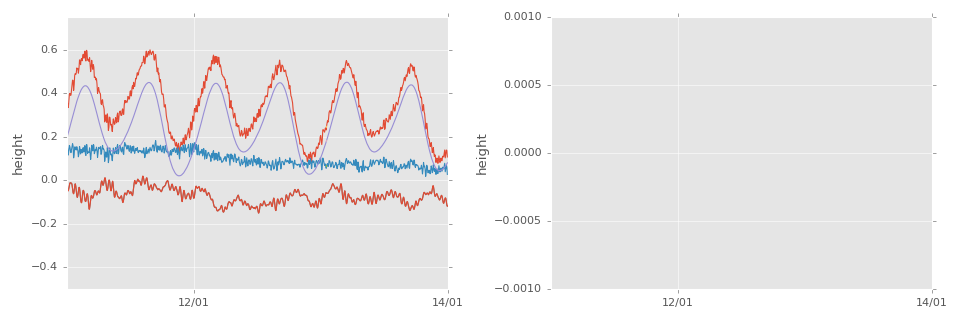

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
for i,val in enumerate(ids[8:10]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist1[i]]=fplot(axes[glist1[i]], idat[smask], 'ss')
   #     axes[glist1[i]].set_title(obs.xs(val)['name'])
        axes[glist1[i]].set_ylim(-.5,np.max([0.75,idat.max().max()]))
        axes[glist1[i]].set_xlim(date,date+datetime.timedelta(days=3))
    except Exception as e:
        print e
        pass    
    try:
        axes[glist1[i]]=fplot(axes[glist1[i]],idat[shmask], 's_his')
    #    axes[glist1[i]].set_title(obs.xs(val)['name'])
        axes[glist1[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
        axes[glist1[i]].set_xlim(date,date+datetime.timedelta(days=3))
    except Exception as e:
        print e
        pass
    axes[glist1[i]].set_ylabel('height')
fig.tight_layout()

In [182]:
%%skip
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
for i,val in enumerate(ids[8:10]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist1[i]],title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
    except:
        pass    
    try:
        idat['s_his'][shmask].plot(ax=axes[glist1[i]],title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist1[i]].set_ylabel('height')
    except:
        pass
fig.tight_layout()

In [183]:
a=np.arange(8)
b=np.arange(2)
glist2=[]
for r in itertools.product(a,b): glist2.append((r[0],r[1]))

<IPython.core.display.Javascript object>


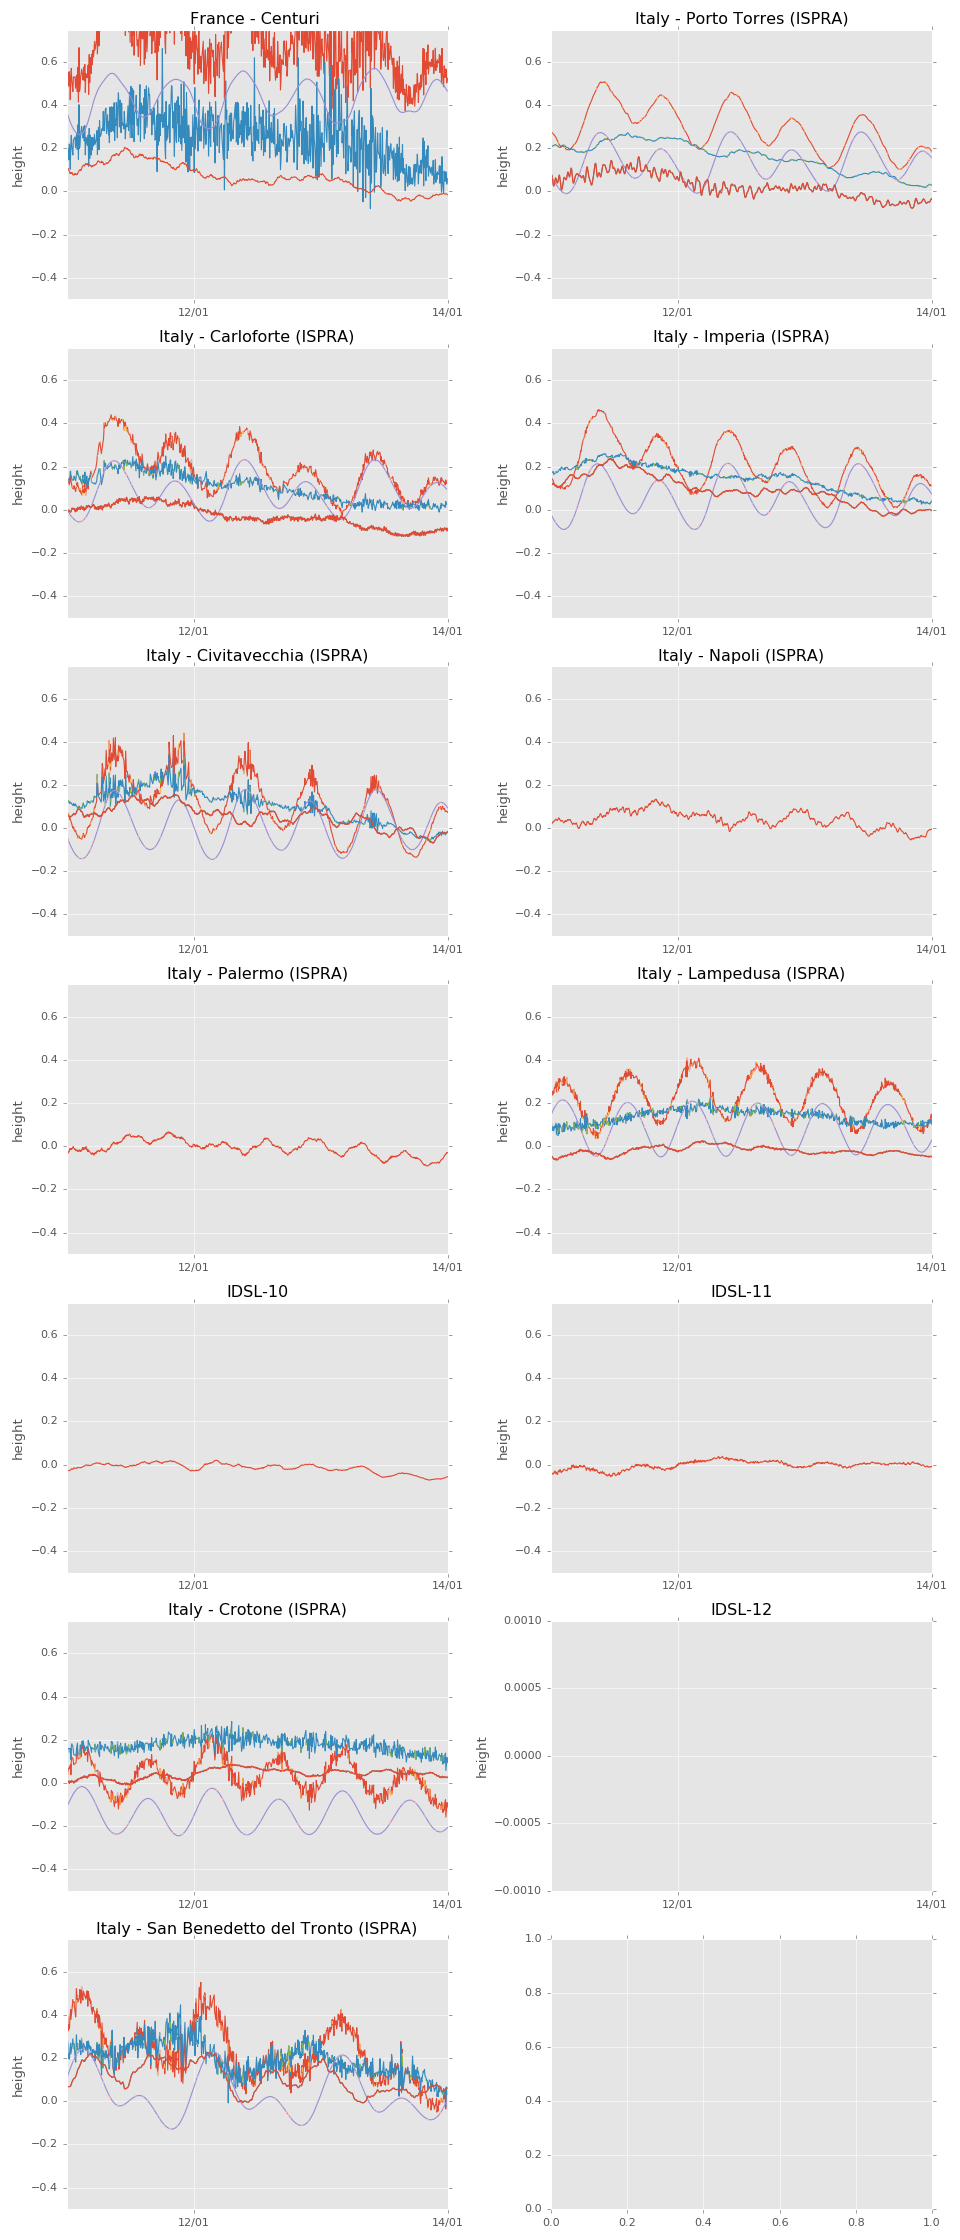

In [185]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12,28) )
for i,val in enumerate(ids[10:23]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist2[i]]=fplot(axes[glist2[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist2[i]]=fplot(axes[glist2[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist2[i]].set_title(obs.xs(val)['name'])
    axes[glist2[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist2[i]].set_xlim(date,date+datetime.timedelta(days=3))
    axes[glist2[i]].set_ylabel('height')
    
fig.tight_layout()

In [186]:
%%skip
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[10:26]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist2[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist2[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist2[i]].set_ylabel('height')
    except:
        pass
    axes[glist2[i]]
fig.tight_layout()

<IPython.core.display.Javascript object>


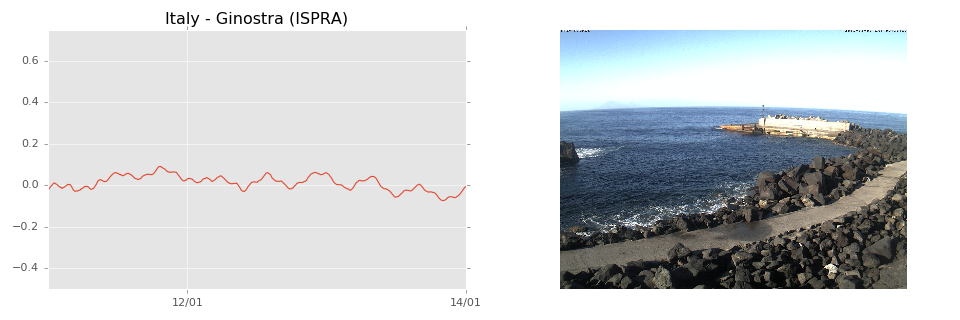

In [187]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
val=1847
idat=tota.xs(val)
smask=np.isfinite(idat['ss'])
shmask=np.isfinite(idat)['s_his']
try:
        axes[0]=fplot(axes[0], idat[smask], 'ss')
except:
        pass    
try:
        axes[0]=fplot(axes[0], idat[shmask], 's_his')
except:
        pass
    
axes[0].set_title(obs.xs(val)['name'])
axes[0].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
axes[0].set_xlim(date,date+datetime.timedelta(days=3))

url_ = 'http://www.mareografico.it/DATA/Ginostra.jpg'
file_= cStringIO.StringIO(urllib.urlopen(url_).read())
img_=Image.open(file_)
axes[1]=plt.imshow(img_)
axes[1]=plt.axis('off')

fig.tight_layout()

<IPython.core.display.Javascript object>


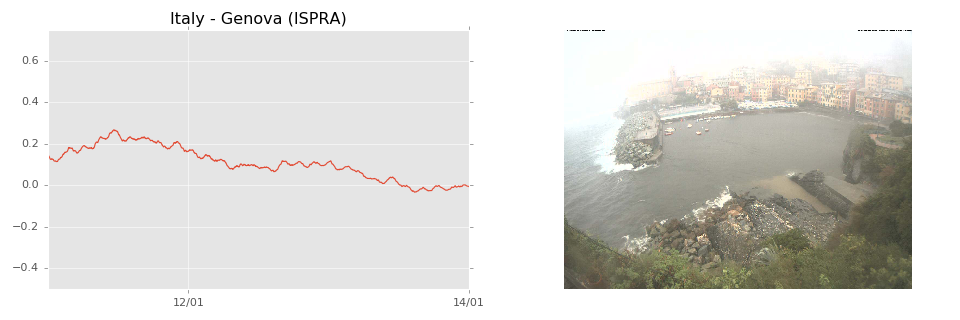

In [188]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
val=1846
idat=tota.xs(val)
smask=np.isfinite(idat['ss'])
shmask=np.isfinite(idat)['s_his']

try:
        axes[0]=fplot(axes[0], idat[smask], 'ss')
except:
        pass    
try:
        axes[0]=fplot(axes[0], idat[shmask], 's_his')
except:
        pass
    
axes[0].set_title(obs.xs(val)['name'])
axes[0].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
axes[0].set_xlim(date,date+datetime.timedelta(days=3))

url_ = ' http://www.webcam.comune.genova.it/images_out/current.jpg'
file_= cStringIO.StringIO(urllib.urlopen(url_).read())
img_=Image.open(file_)
axes[1]=plt.imshow(img_)
axes[1]=plt.axis('off')

fig.tight_layout()

<IPython.core.display.Javascript object>


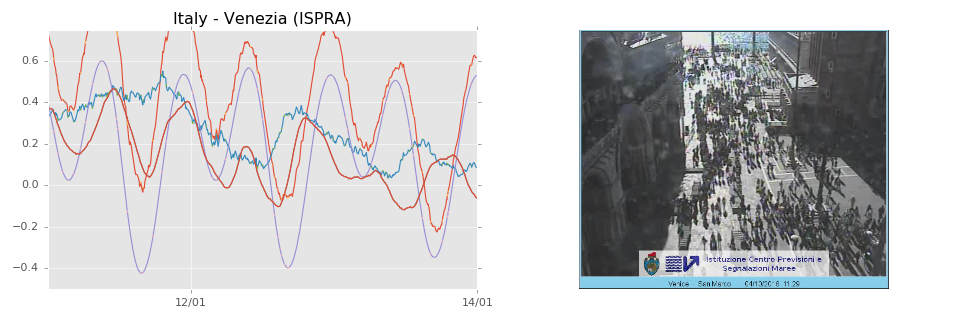

In [189]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4) )
val=1870
idat=tota.xs(val)
smask=np.isfinite(idat['ss'])
shmask=np.isfinite(idat)['s_his']
try:
        axes[0]=fplot(axes[0], idat[smask], 'ss')
except:
        pass    
try:
        axes[0]=fplot(axes[0], idat[shmask], 's_his')
except:
        pass
    
axes[0].set_title(obs.xs(val)['name'])
axes[0].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
axes[0].set_xlim(date,date+datetime.timedelta(days=3))

url_ = ' http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg'
file_= cStringIO.StringIO(urllib.urlopen(url_).read())
img_=Image.open(file_)
axes[1]=plt.imshow(img_)
axes[1]=plt.axis('off')

fig.tight_layout()

EAST MEDITERRANEAN SEA : GREECE , CYPRUS AND TURKEY

In [190]:
a=np.arange(4)
b=np.arange(2)
glist3=[]
for r in itertools.product(a,b): glist3.append((r[0],r[1]))

<IPython.core.display.Javascript object>


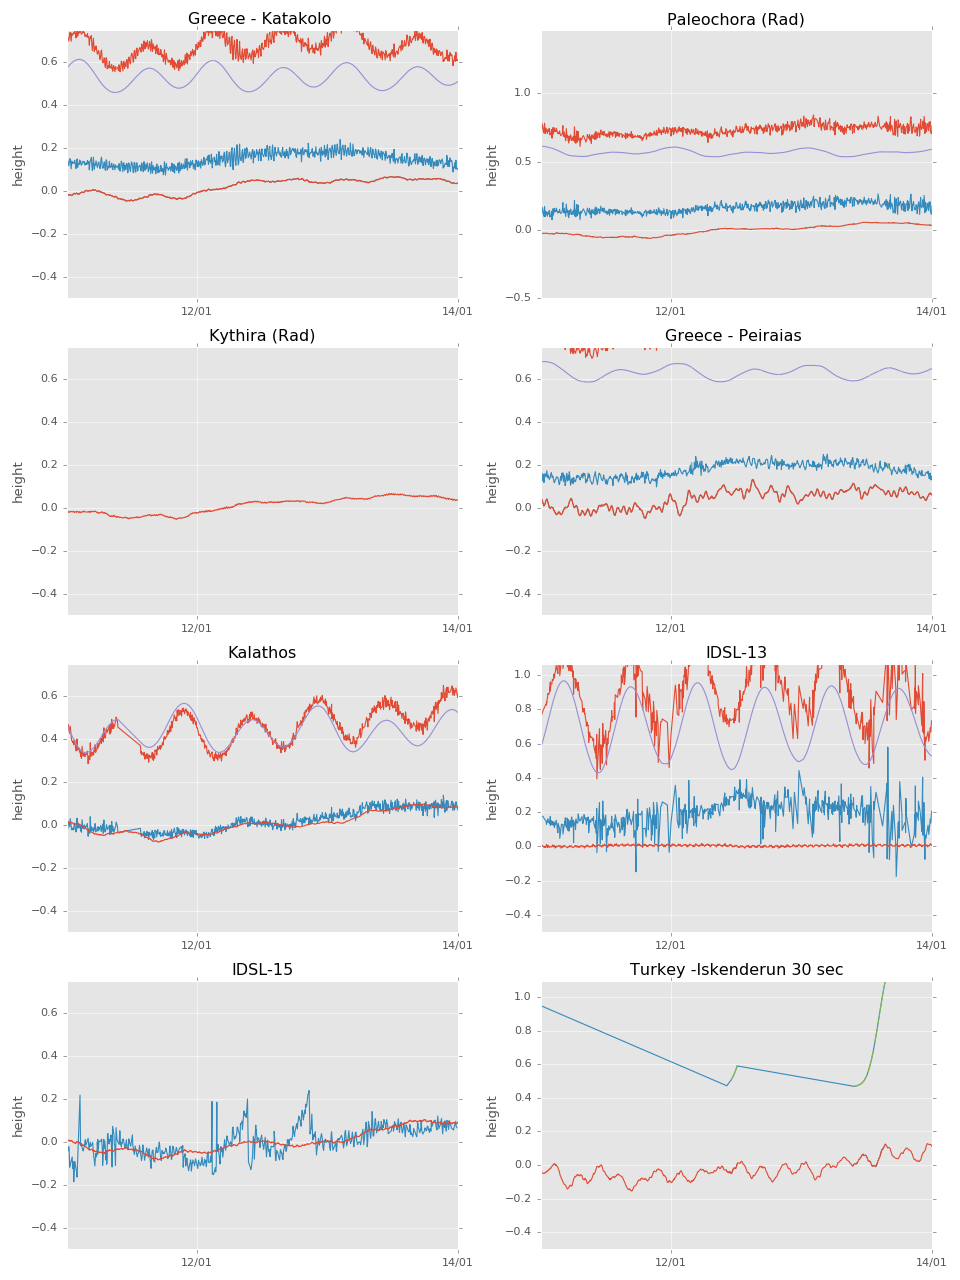

In [191]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[23:31]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist3[i]]=fplot(axes[glist3[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist3[i]]=fplot(axes[glist3[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist3[i]].set_title(obs.xs(val)['name'])
    axes[glist3[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist3[i]].set_xlim(date,date+datetime.timedelta(days=3))
    axes[glist3[i]].set_ylabel('height')
fig.tight_layout()

In [192]:
%%skip
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12,16) )
for i,val in enumerate(ids[26:34]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist3[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist3[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist3[i]].set_ylabel('height')
    except:
        pass
    axes[glist3[i]]
fig.tight_layout()

MIDDLE EAST : LEBANON , ISRAEL AND EGYPT

In [193]:
a=np.arange(2)
b=np.arange(2)
glist4=[]
for r in itertools.product(a,b): glist4.append((r[0],r[1]))

<IPython.core.display.Javascript object>


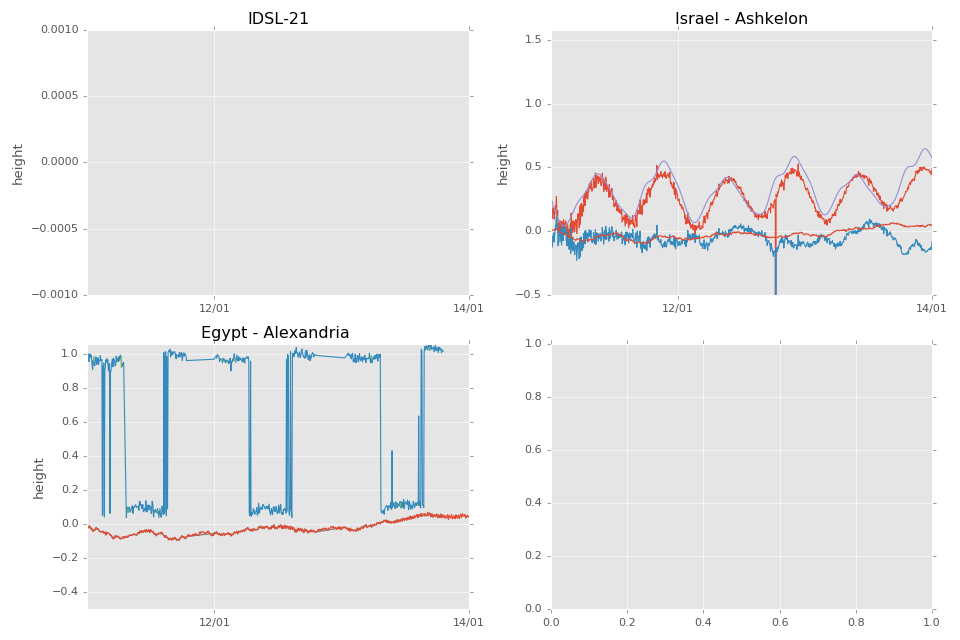

In [195]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[31:34]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist4[i]]=fplot(axes[glist4[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist4[i]]=fplot(axes[glist4[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist4[i]].set_title(obs.xs(val)['name'])
    axes[glist4[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist4[i]].set_xlim(date,date+datetime.timedelta(days=3))
    axes[glist4[i]].set_ylabel('height')
fig.tight_layout()

In [196]:
%%skip
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[34:37]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist4[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist3[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist4[i]].set_ylabel('height')
    except:
        pass
    axes[glist4[i]]
fig.tight_layout()

BLACK SEA

In [197]:
a=np.arange(2)
b=np.arange(2)
glist5=[]
for r in itertools.product(a,b): glist5.append((r[0],r[1]))

<IPython.core.display.Javascript object>


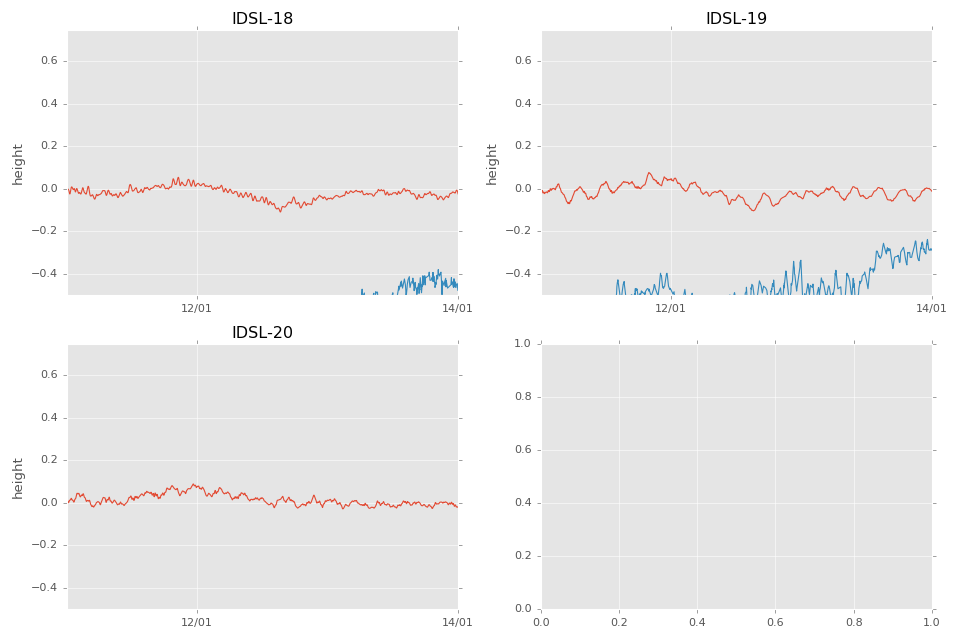

In [198]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[34:37]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        axes[glist5[i]]=fplot(axes[glist5[i]], idat[smask], 'ss')
    except Exception as e:
        print e
        pass    
    try:
        axes[glist5[i]]=fplot(axes[glist5[i]],idat[shmask], 's_his')
    except Exception as e:
        print e
        pass
    
    axes[glist5[i]].set_title(obs.xs(val)['name'])
    axes[glist5[i]].set_ylim(-.5,np.max([0.75,idat[['ss','s_his']].max().max()]))
    axes[glist5[i]].set_xlim(date,date+datetime.timedelta(days=3))    
    axes[glist5[i]].set_ylabel('height')
fig.tight_layout()

In [118]:
%%skip
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8) )
for i,val in enumerate(ids[37:40]):
    idat=tota.xs(val)
    smask=np.isfinite(idat['ss'])
    shmask=np.isfinite(idat)['s_his']
    try:
        idat['ss'][smask].plot(ax=axes[glist5[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        shmask=np.isfinite(idat)['s_his']
    except:
        pass
    try:
        idat['s_his'][shmask].plot(ax=axes[glist5[i]], title=obs.xs(val)['name'], legend=None, ylim=[-.5,np.max([0.75,idat.max().max()])])
        axes[glist5[i]].set_ylabel('height')
    except:
        pass
    axes[glist5[i]]
fig.tight_layout()

## REFERENCES:

Measured data from National Centres, Estimation from Joint Research Centre (JRC) based on
Meteorological Forecasts from European Centre for Medium Weather Forecast (ECMWF) and
using the DELTARES-DELFT3D Flow code.

European Centre for Medium Weather Forecast (ECMWF) data: http://www.ecmwf.int/

DELTARES: https://www.deltares.nl/en/

DELFT3D: https://oss.deltares.nl/web/delft3d

EUMETSAT: http://oiswww.eumetsat.org/IPPS/html/latestImages/EUMETSAT_MSG_IR108EColor-centralEurope.jpg

Webcam in Ginostra, Stromboli Island, by Istituto Superiore per la Protezione e la Ricerca Ambientale: http://www.mareografico.it/DATA/Ginostra.jpg

Webcam in Genova Nervi, the small harbour, by Comune di Genova: http://www.webcam.comune.genova.it/images_out/current.jpg

Webcam in Venezia, Piazza San Marco, by Istitutuzione Centro Previsione e Segnalazione Maree: http://93.62.201.235/maree/WEBCAM/smarcoweb2.jpg

Webcam in Palma de Mallorca, http://www.helios-hotels.com/mallorca/en/webcam-can-pastilla-beach.htm

In [ ]:
### CHECK

In [ ]:
%%skip
html_string = '''
<html>
    <head>
        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.1/css/bootstrap.min.css">
        <style>body{ margin:0 100; background:whitesmoke; }</style>
    </head>
    <body>
        <h1>2014 technology and CPG stock prices</h1>

        <!-- *** Section 1 *** --->
        <h2>Section 1: Apple Inc. (AAPL) stock in 2014</h2>
        <iframe width="1000" height="550" frameborder="0" seamless="seamless" scrolling="no" \
src='http://tsunami.jrc.it/ECMWF/2016/FIX_MED_SEA/calc_20160707.00/OUT_TIF_H_48.jpg'?width=800&height=550"></iframe>
        <p>Apple stock price rose steadily through 2014.</p>
        
        <!-- *** Section 2 *** --->
        <h2>Section 2: AAPL compared to other 2014 stocks</h2>
        <iframe width="1000" height="1000" frameborder="0" seamless="seamless" scrolling="no" \
src='http://tsunami.jrc.it/ECMWF/2016/FIX_MED_SEA/calc_20160707.00/OUT_TIF_H_72.jpg'?width=1000&height=1000"></iframe>
        <p>GE had the most predictable stock price in 2014. IBM had the highest mean stock price. \
The red lines are kernel density estimations of each stock price - the peak of each red lines \
corresponds to its mean stock price for 2014 on the x axis.</p>
    </body>
</html>'''

In [ ]:
%%skip
f = open('tmp/report.html','w')
f.write(html_string)
f.close()
